In [175]:
import numpy as np
import matplotlib.pyplot as plt
import timeit
import time
from scipy import stats
!pip install kaleido
import kaleido 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


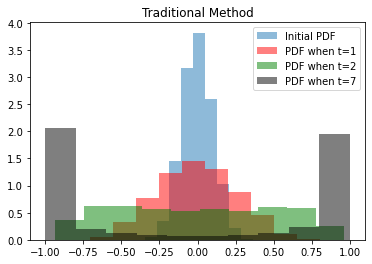

In [176]:
# for dynamical system dx/dt = 1-x^3
# the analytical solution is  x=xi*np.exp(t)*(1-xi^2+xi^2exp(2t))^(-0.5) where xi = initial location, x=current location

# generating 10000 data points with mean = 0 and std = 0.5
xi     = np.random.normal(0, 0.1, 10000)
plt.figure()
plt.hist(xi,density='True',label='Initial PDF',alpha=0.5) # plot pdf

t      = 1
x      = xi*np.exp(t)*(1-xi**2+xi**2*np.exp(2*t))**(-0.5)
plt.hist(x,color='red',density='True',label='PDF when t=1',alpha=0.5) # plot pdf

t      = 2
x      = xi*np.exp(t)*(1-xi**2+xi**2*np.exp(2*t))**(-0.5)
plt.hist(x,color='green',density='True',label='PDF when t=2',alpha=0.5) # plot pdf

t      = 4
x      = xi*np.exp(t)*(1-xi**2+xi**2*np.exp(2*t))**(-0.5)
plt.hist(x,color='black',density='True',label='PDF when t=7',alpha=0.5) # plot pdf

plt.title('Traditional Method')
plt.legend()
plt.show()



In [177]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
def LE_method(x,rho,n_step,t_size):
    for count in range(n_step): # forward for 1 time steps
        xi   = x
        xint = 0
        for i in np.arange(0,t_size*1000,1):
            tp = i*t_size/(t_size*1000)
            x  = xi*np.exp(tp)*(1-xi*xi+xi*xi*np.exp(2*tp))**(-1/2)
            c  = 1-3*x*x
            xint += c
        rho  = rho*np.exp(-xint*t_size/1000)
        rho  = rho/np.trapz(rho,x)
    return x,rho
def PDF(x,mu,std):
    return stats.norm(mu, std).pdf(x)

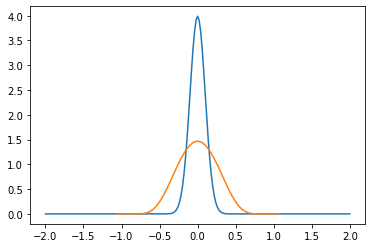

In [ ]:
t      = 1
fig    = plt.figure()
xi     = np.arange(-2,2.02,0.02) 
x      = np.arange(-2,2.02,0.02)
x_ref  = np.arange(-2,2.02,0.02)
rho    = PDF(x,0,0.1)
plt.plot(x,rho)
x_plot,rho_plot = LE_method(x,rho,n_step=1,t_size=1)
plt.plot(x_plot,rho_plot)

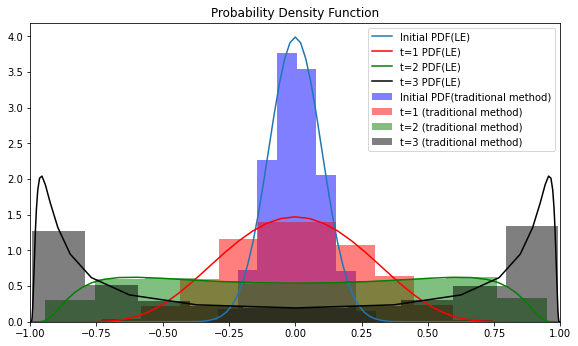

In [ ]:
def PDF(x,mu,std):
    return stats.norm(mu, std).pdf(x)

import time

t      = 1
fig    = plt.figure()
xi     = np.arange(-2,2.02,0.02) 
x      = np.arange(-2,2.02,0.02)
x_ref  = np.arange(-2,2.02,0.02)
rho    = PDF(x,0,0.1)  # generate the initial pdf 
original_rho_int = np.sum(rho)
plt.plot(x_ref,rho/np.trapz(rho,x),label='Initial PDF(LE)')

for count in range(1): # forward for 1 time steps
    xi   = x
    xint = 0
    for i in np.arange(0,t*1000,1):
        tp = i*t/(t*1000)
        x  = xi*np.exp(tp)*(1-xi*xi+xi*xi*np.exp(2*tp))**(-1/2)
        c  = 1-3*x*x
        xint += c
    rho  = rho*np.exp(-xint*t/1000)
    rho  = rho/np.trapz(rho,x)
plt.plot(x,rho,'r',label='t=1 PDF(LE)')

for count in range(1): # forward for 2 time steps
    xi  = x
    xint = 0
    for i in np.arange(0,t*1000,1):
        tp = i*t/(t*1000)
        x  = xi*np.exp(tp)*(1-xi*xi+xi*xi*np.exp(2*tp))**(-1/2)
        c  = 1-3*x*x
        xint += c
    rho  = rho*np.exp(-xint*t/1000)
    rho  = rho/np.trapz(rho,x)
plt.plot(x,rho,'g',label='t=2 PDF(LE)')


for count in range(1): # forward for 7 time steps
    xi  = x
    xint = 0
    for i in np.arange(0,t*1000,1):
        tp = i*t/(t*1000)
        x  = xi*np.exp(tp)*(1-xi*xi+xi*xi*np.exp(2*tp))**(-1/2)
        c  = 1-3*x*x
        xint += c
    rho  = rho*np.exp(-xint*t/1000)
    rho  = rho/np.trapz(rho,x)
plt.plot(x,rho,'k',label='t=3 PDF(LE)')


start = time.time()
xi     = np.random.normal(0, 0.1, 10000)
plt.hist(xi,color='blue',density='True',label='Initial PDF(traditional method)',alpha=0.5) # plot pdf

t      = 1
x      = xi*np.exp(t)*(1-xi**2+xi**2*np.exp(2*t))**(-0.5)
plt.hist(x,color='red',density='True',label='t=1 (traditional method)',alpha=0.5) # plot pdf

t      = 2
x      = xi*np.exp(t)*(1-xi**2+xi**2*np.exp(2*t))**(-0.5)
plt.hist(x,color='green',density='True',label='t=2 (traditional method)',alpha=0.5) # plot pdf

t      = 3
x      = xi*np.exp(t)*(1-xi**2+xi**2*np.exp(2*t))**(-0.5)
plt.hist(x,color='black',density='True',label='t=3 (traditional method)',alpha=0.5) # plot pdf
plt.legend()
plt.xlim([-1,1])
plt.title('Probability Density Function')
fig.set_size_inches(9.5, 5.5)
fig.savefig('/content/gdrive/MyDrive/website-hugo/chaos_and_predictability/week6/Liouville_vs_traditional.png', dpi=300, bbox_inches='tight')

In [ ]:
# applying the LE to Lorenz 63 model: (define the function for Lorenz model)


import numpy as np
class ChaosAttractors():
    """
    Initial conditions for the systems to display chaotic behaviour are 
    defined as follows:

    Lorenz 63 -> s = 10, r = 8/3, b = 28 and dt = 0.01
    Fabrikant-Rabinovich -> a = 0.14, g = 0.1 and dt = 0.01
    Rossler -> a = 0.2, b = 0.2, c = 6.3 and dt = 0.01 
    """
    def __init__(self, steps, lrz_s=10, lrz_r=28, lrz_b=8/3, lrz_dt = 0.01, 
                 rab_fab_a = 0.14, rab_fab_g = 0.1, rab_fab_dt = 0.01,
                 ros_a=0.2, ros_b=0.2, ros_c=6.3, ros_dt = 0.01):
        self.lrz_s = lrz_s
        self.lrz_b = lrz_b
        self.lrz_r = lrz_r
        self.lrz_dt = lrz_dt
        self.rab_fab_a = rab_fab_a
        self.rab_fab_g = rab_fab_g
        self.rab_fab_dt = rab_fab_dt
        self.ros_a = ros_a
        self.ros_b = ros_b
        self.ros_c = ros_c
        self.ros_dt = ros_dt
        self.steps = steps
        
    """Lorenz 63 System"""    
    def lorenz63(self):
        xs = np.empty((self.steps + 1,))
        ys = np.empty((self.steps + 1,))
        zs = np.empty((self.steps + 1,))
        
        xs[0], ys[0], zs[0] = (1.0, 1.0, 1.0)
        for i in range(self.steps):
            x_dot = self.lrz_s*(ys[i] - xs[i])
            y_dot = self.lrz_r*xs[i] - ys[i] - xs[i]*zs[i]
            z_dot = xs[i]*ys[i] - self.lrz_b*zs[i]
            xs[i + 1] = xs[i] + (x_dot * self.lrz_dt)
            ys[i + 1] = ys[i] + (y_dot * self.lrz_dt)
            zs[i + 1] = zs[i] + (z_dot * self.lrz_dt)
        return xs, ys, zs
    
    """Rabinovich–Fabrikant equations"""
    def rabinovich_fabrikant(self):
        xs = np.zeros((self.steps))
       	ys = np.zeros((self.steps))
       	zs = np.zeros((self.steps))
       	xs[0] ,ys[0] ,zs[0] = (-1,0,0.5)
       	
       	for i in range(1,self.steps):
       		x = xs[i-1]
       		y = ys[i-1]
       		z = zs[i-1]
       		dx = y*(z - 1 + x*x) + self.rab_fab_g*x
       		dy = x*(3*z + 1 - x*x) + self.rab_fab_g *y
       		dz = -2*z*(self.rab_fab_a  + x*y)
       		xs[i] = x+self.rab_fab_dt*dx
       		ys[i] = y+self.rab_fab_dt*dy
       		zs[i] = z+self.rab_fab_dt*dz
        return xs, ys, zs
    
    """Rossler Hyperchaotic System"""
    def rossler(self):
        xs = np.empty([self.steps + 1])
        ys = np.empty([self.steps + 1])
        zs = np.empty([self.steps + 1])
        xs[0], ys[0], zs[0] = (1.0, 1.0, 1.0)
        
        for i in range(self.steps):
            x_dot = -ys[i] - zs[i]
            y_dot = xs[i] + self.ros_a*ys[i]
            z_dot = self.ros_b + xs[i]*zs[i] - self.ros_c*zs[i]
            xs[i+1] = xs[i] + (x_dot * self.ros_dt)
            ys[i+1] = ys[i] + (y_dot * self.ros_dt)
            zs[i+1] = zs[i] + (z_dot * self.ros_dt)
        return xs, ys, zs


In [ ]:
# Define length of the chaotic time series
#attractors_series  = ChaosAttractors(1000)
# Obtain the time series for the Lorenz systems
#lorenz_x, lorenz_y, lorenz_z = attractors_series.lorenz63()


def lorenz63(steps, lrz_s=10, lrz_r=28, lrz_b=8/3, lrz_dt = 0.01, ensemble=10):
    if ensemble>1:
        xs = np.empty((steps + 1,ensemble))
        ys = np.empty((steps + 1,ensemble))
        zs = np.empty((steps + 1,ensemble))
        
        xs[0,:], ys[0,:], zs[0,:] = 1+np.random.normal(0, 0.1, ensemble), 1+np.random.normal(0, 0.1, ensemble),1+np.random.normal(0, 0.1, ensemble)
        
        for i in range(steps):
            x_dot = lrz_s*(ys[i,:] - xs[i,:])
            y_dot = lrz_r*xs[i,:] - ys[i,:] - xs[i,:]*zs[i,:]
            z_dot = xs[i]*ys[i,:] - lrz_b*zs[i,:]
            xs[i + 1,:] = xs[i,:] + (x_dot * lrz_dt)
            ys[i + 1,:] = ys[i,:] + (y_dot * lrz_dt)
            zs[i + 1,:] = zs[i,:] + (z_dot * lrz_dt)
            # estimate error growth rate 
            dx_x    = -lrz_s
            dy_y    = -1
            dz_z    = -lrz_b
    else:
        xs = np.empty((steps + 1,))
        ys = np.empty((steps + 1,))
        zs = np.empty((steps + 1,))
        
        xs[0,], ys[0,], zs[0,] = 1, 1,1

        for i in range(steps):
            x_dot = lrz_s*(ys[i] - xs[i])
            y_dot = lrz_r*xs[i] - ys[i] - xs[i]*zs[i]
            z_dot = xs[i]*ys[i] - lrz_b*zs[i]
            xs[i + 1] = xs[i] + (x_dot * lrz_dt)
            ys[i + 1] = ys[i] + (y_dot * lrz_dt)
            zs[i + 1] = zs[i] + (z_dot * lrz_dt)
    return xs, ys, zs

In [ ]:
def LE_method(x,rho,n_step,t_size):
    for count in range(n_step): # forward for 1 time steps
        xi   = x
        xint = 0
        for i in np.arange(0,t_size*1000,1):
            tp = i*t_size/(t_size*1000)
            x  = xi*np.exp(tp)*(1-xi*xi+xi*xi*np.exp(2*tp))**(-1/2)
            c  = 1-3*x*x
            xint += c
        rho  = rho*np.exp(-xint*t_size/1000)
        rho  = rho/np.trapz(rho,x)
    return x,rho
def PDF(x,mu,std):
    return stats.norm(mu, std).pdf(x)

In [259]:
def LE_method_LR63(xs,ys,zs,rho_xyz,n_step, lrz_s=10, lrz_r=28, lrz_b=8/3, lrz_dt = 0.001):
    for count in range(n_step): # forward for 1 time steps
        xint   = 0
        for i in np.arange(0,n_step,1):
            tp = i*lrz_dt/(lrz_dt*1000)
              
            x_dot = lrz_s*(ys - xs)
            y_dot = lrz_r*xs - ys - xs*zs
            z_dot = xs*ys - lrz_b*zs
            c     = -lrz_s-1-lrz_b
            xint += c
            xs = xs + (x_dot * lrz_dt)
            ys = ys + (y_dot * lrz_dt)
            zs = zs + (z_dot * lrz_dt)
        #print(xint/1000)
        rho_xyz   = rho_xyz*np.exp(xint*lrz_dt*n_step)
        sort_index_x    = np.argsort(xs)
        xs_template     = xs[sort_index_x]
        sort_index_y    = np.argsort(ys)
        ys_template     = ys[sort_index_y]
        sort_index_z    = np.argsort(zs)
        zs_template     = zs[sort_index_z]

        rho_xyz         = rho_xyz*np.exp(xint*lrz_dt*n_step)
        rho_xyz_template = rho_xyz[sort_index_x,:,:]
        rho_xyz_template = rho_xyz_template[:,sort_index_y,:]
        rho_xyz_template = rho_xyz_template[:,:,sort_index_z]
        rho_yz_template  = np.trapz(rho_xyz_template,xs_template,axis=0)
        rho_z_template   = np.trapz(rho_yz_template,ys_template,axis=0)
        rho_template     = np.trapz(rho_z_template,zs_template,axis=0)
        print(rho_template)
        rho_xyz          = rho_xyz/rho_template
    return xs,ys,zs, rho_xyz

def PDF_3D(x,y,z,mu,std):
    pdf_x = stats.norm(mu, std).pdf(x)
    pdf_y = stats.norm(mu, std).pdf(y)
    pdf_z = stats.norm(mu, std).pdf(z)
    pdf_3d = np.zeros((np.size(x),np.size(y),np.size(z)))
    for i in range(np.size(pdf_x)):
        for j in range(np.size(pdf_y)):
            for k in range(np.size(pdf_z)):
                pdf_3d[i,j,k] = pdf_x[i]*pdf_y[j]*pdf_z[k]
    return pdf_3d

In [221]:
def LE_method_LR84(xs,ys,zs,rho_xyz,n_step, lrz_a=0.25, lrz_b=4, F=8,G=1.25, lrz_dt = 0.001):
    for count in range(n_step): # forward for 1 time steps
        xint   = 0
        for i in np.arange(0,n_step,1):
            tp = i*lrz_dt/(lrz_dt*1000)
              
            x_dot = -ys**2-zs**2-lrz_a*xs+lrz_a*F
            y_dot = xs*ys-lrz_b*xs*zs - ys+G
            z_dot = lrz_b*xs*ys+xs*zs-lrz_b*zs
            c     = -lrz_a-(xs-1)*2
            xint += c
            xs = xs + (x_dot * lrz_dt)
            ys = ys + (y_dot * lrz_dt)
            zs = zs + (z_dot * lrz_dt)
        #print(xint/1000)
        sort_index_x    = np.argsort(xs)
        xs_template     = xs[sort_index_x]
        sort_index_y    = np.argsort(ys)
        ys_template     = ys[sort_index_y]
        sort_index_z    = np.argsort(zs)
        zs_template     = zs[sort_index_z]

        rho_xyz   = rho_xyz*np.exp(xint*lrz_dt*n_step)
        rho_xyz_template = rho_xyz[sort_index_x,:,:]
        rho_xyz_template = rho_xyz[:,sort_index_y,:]
        rho_xyz_template = rho_xyz[:,:,sort_index_z]
        rho_yz_template  = np.trapz(rho_xyz_template,xs_template,axis=0)
        rho_z_template   = np.trapz(rho_yz_template,ys_template,axis=0)
        rho_template     = np.trapz(rho_z_template,zs_template,axis=0)
        rho_xyz          = rho_xyz/rho_xyz
    return xs,ys,zs, rho_xyz

In [ ]:
# using Gaussian initial state
xx, yy, zz  = np.random.normal(0, 0.1, 40), np.random.normal(0, 0.1, 40), np.random.normal(0, 0.1, 40)
n_steps     = 100
xs          = np.zeros((n_steps,np.size(xx)))
ys          = np.zeros((n_steps,np.size(xx)))
zs          = np.zeros((n_steps,np.size(xx)))
xs[0,:]     = np.random.normal(0, 1,np.size(xx))
ys[0,:]     = np.random.normal(0, 1,np.size(xx))
zs[0,:]     = np.random.normal(0, 1,np.size(xx))
pdf_3d      = np.zeros((n_steps,np.size(xx),np.size(xx),np.size(xx)))
pdf_3d[0,:] = PDF_3D(xs[0,:],ys[0,:],zs[0,:],0,0.1)

t            = 0
sort_index_x = np.argsort(xs)
xs_template  = xs[t,sort_index_x]
plt.plot(xs_template[0,:])

for i in range(n_steps-1):
    print(i)
    #xs[i+1,:],ys[i+1,:],zs[i+1,:], pdf_3d[i+1,:] =LE_method_LR63(xs=xs[0,:],ys=ys[0,:],zs=zs[0,:],rho_xyz=pdf_3d[0,:],n_step=i,lrz_dt=0.0001)
    xs[i+1,:],ys[i+1,:],zs[i+1,:], pdf_3d[i+1,:] =LE_method_LR84(xs=xs[0,:],ys=ys[0,:],zs=zs[0,:],rho_xyz=pdf_3d[0,:],n_step=i,lrz_dt=0.0001)

In [277]:
xx = np.arange(-2.0,2.2,0.2)
yy = np.arange(-2.0,2.2,0.2)
zz = np.arange(-2.0,2.2,0.2)
n_steps     = 100
pdf_3d      = np.zeros((n_steps,np.size(xx),np.size(xx),np.size(xx)))
pdf_3d[0,:] = PDF_3D(xx,yy,zz,0,1)
xs          = np.zeros((n_steps,np.size(xx)))
ys          = np.zeros((n_steps,np.size(xx)))
zs          = np.zeros((n_steps,np.size(xx)))
xs[0,:]     = xx
ys[0,:]     = yy
zs[0,:]     = zz
#pdf_3d = pdf_3d
for i in range(n_steps-1):
    xs[i+1,:],ys[i+1,:],zs[i+1,:], pdf_3d[i+1,:] =LE_method_LR63(xs=xs[0,:],ys=ys[0,:],zs=zs[0,:],rho_xyz=pdf_3d[0,:],n_step=i,lrz_dt=0.0001)
    #xs[i+1,:],ys[i+1,:],zs[i+1,:], pdf_3d[i+1,:] =LE_method_LR84(xs=xs[0,:],ys=ys[0,:],zs=zs[0,:],rho_xyz=pdf_3d[0,:],n_step=i,lrz_dt=0.0001)
    #xs,ys,zs, pdf_3d_t2 =LE_method_LR63(xs=xx,ys=yy,zs=zz,rho_xyz=pdf_3d,n_step=6,t_size=1)

0.8673876124102357
0.8623927067303517
0.993920392899518
0.8527479771974333
0.9827814094909356
0.9827403488177553
0.8386101291846355
0.9664560974282583
0.9663856510253361
0.9663178148805041
0.8202066989851357
0.9452078627592843
0.9451022148887591
0.9450014385800521
0.9449053083152376
0.797829962225172
0.9193749087265357
0.9192296870524848
0.9190924660519784
0.9189628049926714
0.9188402911026124
0.7718292142706434
0.8893612848882976
0.8891736302937483
0.88899798563118
0.8888335853843511
0.8886797199615487
0.8885357306978071
0.7426017074529216
0.8556263848567313
0.8553949637578748
0.8551803984150157
0.854981470859866
0.8547970635156519
0.8546261491079341
0.8544677817877886
0.7105825734053045
0.8186732736976505
0.8183982353757974
0.8181456407855423
0.8179136799235731
0.8177007085164064
0.8175052295785419
0.8173258774197959
0.817161403728492
0.6762340870204282
0.7790362584857037
0.7787191422708508
0.778430662126875
0.7781682720429166
0.7779296818264878
0.7777128259660078
0.7775158370084071


In [ ]:
np.shape(pdf_3d)

(200, 21, 21, 21)

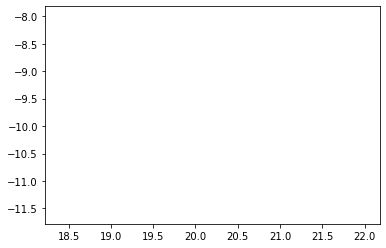

In [245]:
plt.figure()
plt.plot(xs[:,20],ys[:,20])
plt.plot(xs[:,2],ys[:,2])
#xs = xs/np.std(xs[0:40,:])
#ys = ys/np.std(ys)
#zs = zs/np.std(zs)
#plt.plot(xs[:,1])
#plt.plot(xs[:,2])
#plt.plot(xs[:,4])
#plt.plot(xs[:,5])
#plt.plot(xs[:,6])
#plt.plot(xs[:,7])


In [ ]:
pdf_3d[0,0,0,0]

0.015000000000000003

In [231]:
import plotly.graph_objects as go
import numpy as np

#X, Y, Z 0= np.mgrid[-5:5:40j, -5:5:40j, -5:5:40j]
t= 10

sort_index_x    = np.argsort(xs[t,:])
xs_template     = xs[t,sort_index_x]
sort_index_y    = np.argsort(ys[t,:])
ys_template     = ys[t,sort_index_y]
sort_index_z    = np.argsort(zs[t,:])
zs_template     = zs[t,sort_index_z]


xx,yy,zz = np.meshgrid(xs_template, ys_template, zs_template)
# ellipsoid
values = pdf_3d[0,:,:,:]

for i in range(np.shape(xs)[1]):
    for j in range(np.shape(ys)[1]):
        for k in range(np.shape(zs)[1]):
            values[sort_index_x[i],sort_index_y[j],sort_index_z[k]] =  ((xs[0,i]-20)**2+(ys[0,j]+10)**2+zs[0,k]**2)*(0.5)
            #values[sort_index_x[i],sort_index_y[j],sort_index_z[k]] = pdf_3d[t,i,j,k]
#values = (xs[0,:]**2+ys[0,:]**2+zs[0,:]**2)

dim             = np.shape(values)
ped_template    = np.reshape(values[:,:,:],[dim[0]*dim[0]*dim[0],1])

#ped_45          = np.percentile(ped_template,5)
ped_30          = np.percentile(ped_template,99)
ped_0           = np.min(ped_template)
ped_0           = np.max(ped_template)
print(ped_30)
fig = go.Figure(data=go.Isosurface(
    x=xx.flatten(),
    y=yy.flatten(),
    z=zz.flatten(),
    value=values.flatten(),
    opacity=0.4,
    isomin=0,
    isomax=ped_30,
    surface_count=1,
    caps=dict(x_show=False, y_show=False,z_show=False)
    ))
#plt.xlim([-2,-2])
#fig.update_layout(xaxis=dict(range=[-4,4]))
#fig.update_layout(ranges=[-4,4])
#fig.update_layout(ranges=[-4,4])
#fig.update_layout(ranges=[-4,4])
fig.show()

4.979999999999998


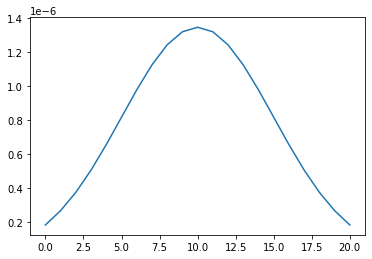

In [281]:
plt.plot(pdf_3d[50,:,0,0])

In [289]:
import plotly.graph_objects as go
import numpy as np

#X, Y, Z 0= np.mgrid[-5:5:40j, -5:5:40j, -5:5:40j]
t               =2
for t in range(50,51):
    sort_index_x    = np.argsort(xs[t,:])
    xs_template     = xs[t,sort_index_x]
    sort_index_y    = np.argsort(ys[t,:])
    ys_template     = ys[t,sort_index_y]
    sort_index_z    = np.argsort(zs[t,:])
    zs_template     = zs[t,sort_index_z]
    


    xlim = np.percentile(xs_template,95)-np.percentile(xs_template,5)
    xmean = np.percentile(xs_template,50)
    ylim = np.percentile(ys_template,95)-np.percentile(ys_template,5)
    ymean = np.percentile(ys_template,50)
    zlim = np.percentile(zs_template,95)-np.percentile(zs_template,5)
    zmean = np.percentile(zs_template,50)

    xx,yy,zz = np.meshgrid(xs_template, ys_template, zs_template)
    values   = np.zeros((np.shape(xs)[1],np.shape(xs)[1],np.shape(xs)[1]))
    for i in range(np.shape(xs)[1]):
       for j in range(np.shape(ys)[1]):
            for k in range(np.shape(zs)[1]):
                #values[sort_index_x[i],sort_index_y[j],sort_index_z[k]] =  ((xs[0,i]-20)**2+(ys[0,j]+10)**2+zs[0,k]**2)*(0.5)
                values[sort_index_x[i],sort_index_y[j],sort_index_z[k]] = pdf_3d[t,i,j,k]

    # ellipsoid
    #values          = pdf_3d[t,:,:,:]
    dim             = np.shape(values)
    ped_template    = np.reshape(values[:,:,:],[dim[0]*dim[0]*dim[0],1])

    ped_45          = np.percentile(ped_template,5)
    ped_55          = np.percentile(ped_template,90)
    ped_0           = np.min(ped_template)
    ped_max         = np.max(ped_template)


#ped_5_upper     = np.percentile(ped_template,55)
#loc1,loc2,loc3  = np.where((pdf_3d[t,:,:,:]>=ped_5_lower) & (pdf_3d[t,:,:,:]<=ped_5_upper))



#ped_50          = np.percentile(ped_template,25)
#loc1,loc2,loc3  = np.where((pdf_3d[t,:,:,:]>=ped_5_lower) & (pdf_3d[t,:,:,:]<=ped_5_upper))


    fig = go.Figure(data=go.Isosurface(
        x=xx.flatten(),
        y=yy.flatten(),
        z=zz.flatten(),
        value=values.flatten(),
        opacity=0.4,
        isomin=ped_45,
        isomax=ped_55,
        surface_count=1,
        #yaxis=dict(range=[-4,4]),
        caps=dict(x_show=False, y_show=False,z_show=False)
        ))
#plt.xlim([-2,-2])
#fig.update_layout(xaxis=dict(range=[-4,4]))
#fig.update_layout(ranges=[-4,4])
#fig.update_layout(ranges=[-4,4])
#fig.update_layout(ranges=[-4,4])
#fig = go.Figure(data=go.Scatter(x=x, y=y, mode='lines'), layout_yaxis_range=[-4,4])
#fig.update(layout_yaxis_range = [-4,4])
    fig.update_layout(
        scene = dict(
        xaxis = dict(nticks=4, range=[xmean-xlim*2,xmean+xlim*2],),
        yaxis = dict(nticks=4, range=[ymean-ylim*2,ymean+ylim*2],),
        zaxis = dict(nticks=4, range=[zmean-zlim*2,zmean+zlim*2],),),
        width=700,
        margin=dict(r=10, l=10, b=10, t=10),scene_aspectmode='cube')

    fig.show()
    #fig.write_image("/content/drive/MyDrive/website-hugo/chaos_and_predictability/week6/Figure/fig_t="+str(t).zfill(2)+".png")

In [ ]:
xx = np.arange(-4,4.1,0.1)
yy = xx
zz = xx
pdf_3d_xyz = PDF_3D(xx,yy,zz,0,1)
pdf_3d_yz = np.trapz(pdf_3d_xyz,xx,axis=0)
pdf_3d_z  = np.trapz(pdf_3d_yz,yy,axis=0)
pdf_3d    = np.trapz(pdf_3d_z,yy,axis=0)
print(pdf_3d)

0.99980731410929


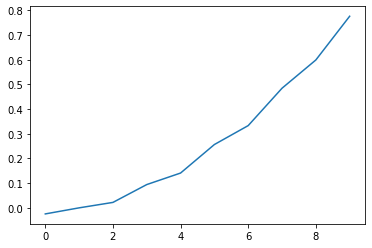

In [ ]:
plt.figure()
plt.plot(zs_template[0:10])

#print(sort_index)

In [ ]:
# define the function for Lorenz 84 system


def lorenz84(steps, lrz_s=10, lrz_r=28, lrz_b=8/3, lrz_dt = 0.001, ensemble=10):
    if ensemble>1:
        xs = np.empty((1,ensemble))
        ys = np.empty((1,ensemble))
        zs = np.empty((1,ensemble))

        x_prime = np.zeros((steps + 1,ensemble))
        y_prime = np.zeros((steps + 1,ensemble))
        z_prime = np.zeros((steps + 1,ensemble))
        #print(np.shape(x_prime))
        #print(np.shape(xs[1,:]))
        xs[0,:], ys[0,:], zs[0,:] = 0.5, 0.5,0.5
        x_prime[0,:], y_prime[0,:], z_prime[0,:] = np.random.normal(0, 0.01, ensemble), np.random.normal(0, 0.01, ensemble),np.random.normal(0, 0.01, ensemble)
        #print(np.shape(xs[1,:]))
        for i in range(steps):   
            x_dot = -lrz_s*x_prime[i,:] +lrz_s*y_prime[i,:] 
            y_dot = -x_prime[i,:]*zs -z_prime[i,:]*xs + lrz_r*x_prime[i,:] - y_prime[i,:]
            z_dot = x_prime[i,:]*ys + y_prime[i,:]*xs - lrz_b*z_prime[i,:]

            x_prime[i + 1,:] = x_prime[i,:] + x_dot*lrz_dt
            y_prime[i + 1,:] = y_prime[i,:] + y_dot*lrz_dt
            z_prime[i + 1,:] = z_prime[i,:] + z_dot*lrz_dt
                #print(np.shape(x_dot))
                #print(np.shape(xs[i,:]))
                #print(np.shape(x_prime))
            #print(np.shape(xs[i,:]))
            #xs[i + 1,:] = xs[i,:] + x_prime*0.1
            #ys[i + 1,:] = ys[i,:] + y_prime*0.1
            #zs[i + 1,:] = zs[i,:] + z_prime*0.1
           
    else:
        xs = np.empty((steps + 1,))
        ys = np.empty((steps + 1,))
        zs = np.empty((steps + 1,))
        
        xs[0,], ys[0,], zs[0,] = 1, 1,1

        for i in range(steps):
            x_dot = lrz_s*(ys[i] - xs[i])
            y_dot = lrz_r*xs[i] - ys[i] - xs[i]*zs[i]
            z_dot = xs[i]*ys[i] - lrz_b*zs[i]
            xs[i + 1] = xs[i] + (x_dot * lrz_dt)
            ys[i + 1] = ys[i] + (y_dot * lrz_dt)
            zs[i + 1] = zs[i] + (z_dot * lrz_dt)
    return x_prime+xs, y_prime+ys, z_prime+zs 

(10001, 10)

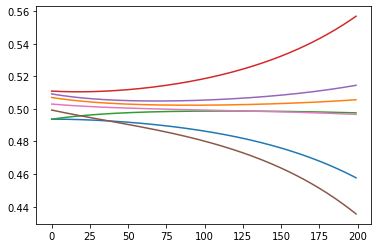

In [ ]:
#del xs, ys, zs
xs, ys, zs = lorenz84(10000)
plt.figure()
plt.plot(xs[0:200,0])
plt.plot(xs[0:200,1])
plt.plot(xs[0:200,3])
plt.plot(xs[0:200,4])
plt.plot(xs[0:200,5])
plt.plot(xs[0:200,6])
plt.plot(xs[0:200,7])

np.shape(xs)

In [ ]:
np.shape(xs)

(5001, 10)